<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/eSports_Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **eSports Earnings**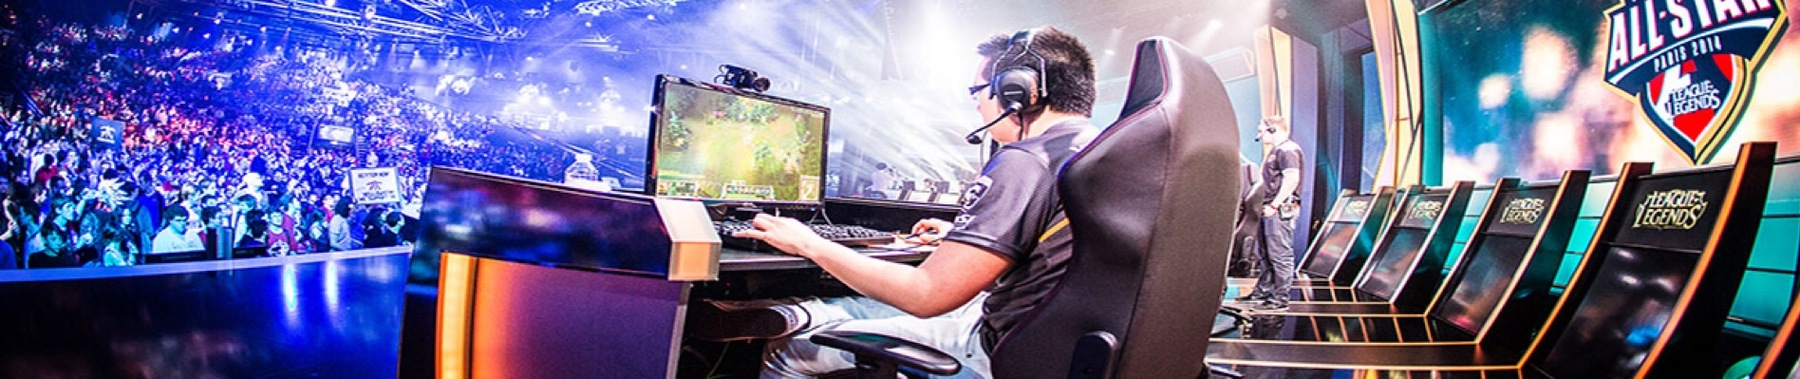
Money earned by Players & Teams from eSports Tournaments

# **About Dataset**
## **Context**
This is scraped data from eSportsEarning.com that provides information on earnings 💰 of eSports players and teams.

## **Content**
Three CSV files:
highest_earning_players.csv
highest_earning_teams.csv
country-and-continent-codes-list.csv


## **The data from CSV files (1) & (2) includes these games:**

Dota 2
Counter-Strike: Global Offensive
Fortnite
League of Legends
Starcraft II
Overwatch
PUBG
Hearthstone
Heroes of the Storm
Arena of Valor

## **Acknowledgements**
This dataset was inspired from Ran Kirshenboim's original data set - Esports Earnings 1998 - 2020. Thank you Ran, I used your data set (along with other data) to produce this Tableau story on eSports.

## **Inspiration**
Please see the Exploratory Data Analysis task for inspiration on how to use this data set.

In [115]:
earning_player = pd.read_csv('drive/MyDrive/Data FPT/highest_earning_players.csv')
earning_team = pd.read_csv('drive/MyDrive/Data FPT/highest_earning_teams.csv')
country = pd.read_csv('drive/MyDrive/Data FPT/country-and-continent-codes-list.csv')

Data Understanding:
 - Type of datasets
 - Null Checking
 - Replace Null

In [116]:
print("Data Information")
print(100*"-")
print(" Shape of Highest_earning_player: {}".format(earning_player.shape))
print("\n Shape of Highest_earning_team: {}".format(earning_team.shape))
print("\n Shape of Country: {}".format(earning_player.shape))




Data Information
----------------------------------------------------------------------------------------------------
 Shape of Highest_earning_player: (1000, 8)

 Shape of Highest_earning_team: (928, 6)

 Shape of Country: (1000, 8)


In [117]:
print("Earning Highest Players Dataset \n ")
earning_player.info()

print("\n -----------------------------------------------------")
print("Checking Null observation of Earning Highest Players Dataset \n ")
earning_player.isnull().sum()
# No null data appear in the earning player dataset


Earning Highest Players Dataset 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB

 -----------------------------------------------------
Checking Null observation of Earning Highest Players Dataset 
 


PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [118]:
print("Earning Highest Teams Dataset \n ")
earning_team.info()
print("\n -----------------------------------------------------")
print("Checking Null observation of Earning Highest Teams Dataset \n ")
earning_team.isnull().sum()

Earning Highest Teams Dataset 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB

 -----------------------------------------------------
Checking Null observation of Earning Highest Teams Dataset 
 


TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [119]:
print("Coutry Dataset \n ")
country.info()
print("\n -----------------------------------------------------")
print("Checking Null observation of Earning Highest Teams Dataset \n ")
country.isnull().sum()

Coutry Dataset 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB

 -----------------------------------------------------
Checking Null observation of Earning Highest Teams Dataset 
 


Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [120]:
country.loc[(country['Continent_Code'].isnull()), 'Continent_Code'] = 'NA'
country.loc[(country['Two_Letter_Country_Code'].isnull()),'Two_Letter_Country_Code'] = 'NA'

In [121]:
# Create the function in order to uppercase the Country Code 
# The Country Codes in Highest_earning_players are presenting as Lowercase 
# Therefore, Upper case function is indeed
def uppercase(x):
  return x.upper()

In [122]:
earning_player['CountryCode'] = earning_player['CountryCode'].apply(lambda x: uppercase(x))
earning_player = earning_player.merge(country, left_on = "CountryCode", right_on = "Two_Letter_Country_Code", how = 'left')

In [123]:
earning_player.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",DK,DNK,208.0
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",DK,DNK,208.0
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",DK,DNK,208.0
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",DK,DNK,208.0
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",DK,DNK,208.0


Text(0, 0.5, 'Profession Players')

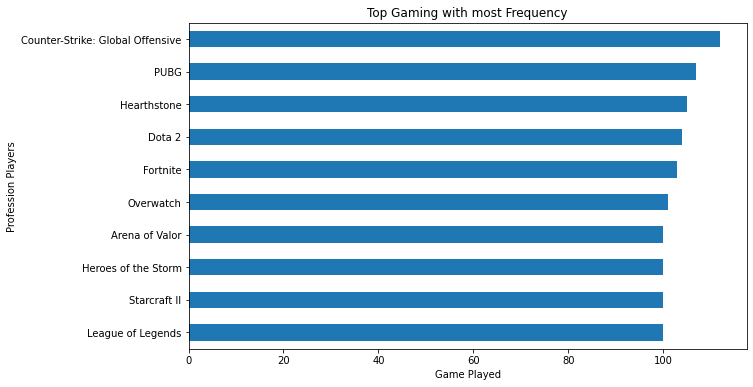

In [124]:
plt.figure(figsize = (10,6))
earning_player['Game'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.title("Top Gaming with most Frequency")
plt.xlabel("Game Played")
plt.ylabel("Profession Players")

# **Boxplot Plotly**
Editor will create boxplot figures to present the data distribution in salary of each game and top 5 countries with the highest earning

In [125]:
earning_player.loc[(earning_player['Game'] == "Counter-Strike: Global Offensive"),'TotalUSDPrize']

0      1822989.41
1      1799288.57
2      1787489.88
3      1652350.75
4      1416448.64
          ...    
107     242273.51
108     239956.42
109     234332.17
110     233210.47
111     232167.42
Name: TotalUSDPrize, Length: 112, dtype: float64

# **Boxplot 10 games most with highest earning for players**

In [126]:
import plotly.express as px
import plotly.graph_objects as go
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']*2
# Create a figure
fig = go.Figure()
# -----------------------------------------------------
# Create dataset x_data - name of Games, y_data - Dataset of each game
x_data = earning_player['Game'].value_counts().keys()
y_data = []
for i in x_data:
  y_data.append(earning_player.loc[(earning_player['Game'] == "Counter-Strike: Global Offensive"),'TotalUSDPrize'])

#------------------------------------------------------
# Fill dataset of each game in figure
for xd, yd, cls in zip(x_data, y_data, colors):
  fig.add_trace(go.Box(
      y = yd,
      name = xd,
      boxpoints = 'all',
      jitter = 0.5, 
      whiskerwidth = 0.2,
      fillcolor = cls,
      marker_size = 2,
      line_width = 1
  ))

# Decorate data using update_layout
fig.update_layout(
    title = "Salary Points by Top 10 Gameplays in the World",
    title_x = 0.5,
    
    title_font_color="red",
    legend_title_font_color="green",
    margin = dict( l = 40, r = 30, b = 80, t = 100),
paper_bgcolor = 'rgb(243, 243, 243)',
plot_bgcolor = 'rgb(243, 243, 243)',
showlegend = True)

fig.show()


# **Boxplot top 10 Countries with players highest earning**

In [127]:
fig = go.Figure()

x_con = ["CN","KR","US","DK","RU","SE","FI","FR"]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
y_con = []
for i in x_con:
  y_con.append(earning_player.loc[(earning_player['CountryCode'] == i), "TotalUSDPrize"])


for xd,yd, cls in zip(x_con,y_con, colors):
  fig.add_trace(go.Box(
                  y = yd,
                  name = xd,
                  boxpoints = 'all',
                  jitter = 0.5,
                  whiskerwidth = 0.2,
                  fillcolor = cls,
                  marker_size = 2,
                  line_width = 1))
  
fig.update_layout(
      title = "Salary of Top 8 Country with Heighest Earning Players in the World",
      title_x = 0.5,
      
      margin = dict(l = 40, r = 30, b = 80, t = 100),
      paper_bgcolor = 'rgb(243,243,243)',
      plot_bgcolor  = 'rgb(243,243,243)',
      showlegend = False
  )

fig.show()
  

#**Create a function use to plot datasets for a specific Country**

In [128]:
# x_data
def country_plot_earning(country,data):
  y = []
  fig = go.Figure()
  colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(93, 164, 214, 0.5)', 
          'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)']
  for i in x_data:
    y.append(data.loc[(data['CountryCode'] == country),"TotalUSDPrize"])
  for xd,yd, cls in zip(x_data,y,colors):
    fig.add_trace(go.Box(y = yd,
                         name = xd,
                         boxpoints = 'all',
                         jitter = 0.5,
                         whiskerwidth = 0.2,
                         fillcolor = cls,
                         marker_size = 2,
                         line_width = 1)
    )
  fig.update_layout(
      title  = "Earning Players Distribution in {}".format(set(data.loc[(data['CountryCode'] == country),"Country_Name"]).pop()),
      title_x = .5,
      margin = dict( l = 40, r = 30, b= 80, t = 100),
      paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False) 
  fig.show()

# **Example:** 
Boxplot Players' Earning from China 

In [129]:
country_plot_earning("CN",earning_player)

Compare 2 countries to see what each country is better

# **Biểu đồ Waffle**
Biểu đồ waffle là một hình ảnh trực quan khá thú vị thường được tạo ra để hiển thị tiến trình đạy được mục đích. Nó thường là một lựa chọn hiệu quả khi bạn đang cố thêm những tính năng trực quan hóa thú vị vào một hình ảnh chủ yếu chứa các hàng như trong Excel.

In [130]:
# Provide a pivot table counting number of PlayerId in the World 
num_player = earning_player.groupby("CountryCode")['PlayerId'].count().sort_values(ascending = False)[:5]
# compute the proportion of each category with respect to the total
total_values = num_player.sum()
category_proportions = [round((float(value) / total_values),4) for value in num_player]

# print out proportions
for i, proportion in enumerate(category_proportions[:10]):
    print (num_player.index.values[i] + ': ' + str(proportion))

KR: 0.4035
CN: 0.2701
US: 0.1833
SE: 0.0723
RU: 0.0707


**Bước 2.** Bước thứ 2 là xác định tổng kích thước của biểu đồ waffle.

In [131]:
# Specify the matrix of Waffle Chart
width = 60
height = 20
total_num_tiles = width*height

In [132]:
num_player

CountryCode
KR    251
CN    168
US    114
SE     45
RU     44
Name: PlayerId, dtype: int64

**Bước 3.**Bước thứ 3 là dùng tỉ lệ phần trăm của mỗi loại để xác định số lượng tiêu đề tương ứng của nó.

In [133]:
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]
# Print out number of tiles per categories
for i, tiles in enumerate(tiles_per_category):
  print(num_player.index.values[i] + ': '+ str(tiles))

KR: 484
CN: 324
US: 220
SE: 87
RU: 85


**Bước 4.** Bước thứ 4 là tạo ra một ma trận giống với biểu đồ waffle và phân bố các thành phần của nó.

In [134]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width))

# Define indices to loop through waffle chart
category_index = 0
tile_index    = 0

# Populate the waffle chart
for col in range(width):
  for row in range(height):
    tile_index += 1
    # If the number of tiles populated for the current category is equal to its corresponding allocated tiles...
    if tile_index > sum(tiles_per_category[:category_index]):
      # ... proceed to the next category
      category_index += 1
    waffle_chart[row,col] = category_index
print("Waffle Chart Populated")    

Waffle Chart Populated


**Plot Waffle Chart using Matshow...**

<Figure size 432x288 with 0 Axes>

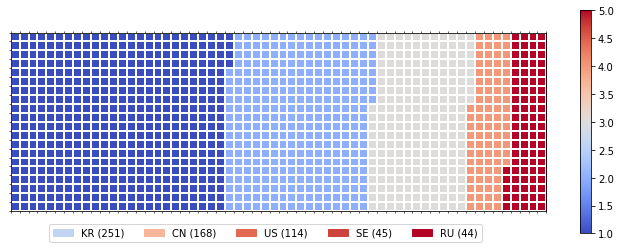

In [135]:
import matplotlib.patches as mpatches # needed for waffle Charts

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(num_player)
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(num_player.index.values):
    label_str = category + ' (' + str(num_player[i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(num_player.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

**Which game is foremost popular in each country? Continent?**

in this cell, I will create another function to see what game is played by most people in each continent. Using Plot.express.Pie

In [136]:
def plot_gaming(x):
  if x in set(earning_player['Continent_Name']):
    df = earning_player.loc[(earning_player["Continent_Name"] == x)].groupby("Game")["PlayerId"].count()
    df = df.to_frame().reset_index()
    return px.pie(df, values = "PlayerId", 
                  names = "Game", 
                  title = "Game played of {} Continent".format(x))
  elif x in set(earning_player['CountryCode']):
    df = earning_player.loc[(earning_player["CountryCode"] == x)].groupby("Game")["PlayerId"].count()
    df = df.to_frame().reset_index()
    return px.pie(df,values = "PlayerId",
                  names = "Game",
                  title = "Game played of {} Continent".format(x))
  else:
    return False

In [137]:
EU = earning_player.loc[(earning_player["Continent_Name"] == "Europe")].groupby("Game")["PlayerId"].count().to_frame().reset_index()
AS = earning_player.loc[(earning_player["Continent_Name"] == "Asia")].groupby("Game")["PlayerId"].count().to_frame().reset_index()
NA = earning_player.loc[(earning_player["Continent_Name"] == "North America")].groupby("Game")["PlayerId"].count().to_frame().reset_index()
OC = earning_player.loc[(earning_player["Continent_Name"] == "Oceania")].groupby("Game")["PlayerId"].count().to_frame().reset_index()
SA = earning_player.loc[(earning_player["Continent_Name"] == "South America")].groupby("Game")["PlayerId"].count().to_frame().reset_index()

In [138]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3,
                    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                    subplot_titles=["Player of Europe","Player in Asia","Player of N.America"])
fig.add_trace(go.Pie(
    labels = EU["Game"],
    values = EU["PlayerId"], 
    pull=[0.2, 0, 0, 0,0,0,0,0,0,0],
    name="Player"),
    1,1)
fig.add_trace(go.Pie(
    labels = AS["Game"],
    values = AS["PlayerId"],
    pull=[0.2, 0, 0, 0,0,0,0,0,0,0],
    name="Game played of Asia Continent"),
    1,2)
fig.add_trace(go.Pie(
    labels = NA["Game"],
    values = NA["PlayerId"],
    pull=[0.2, 0, 0, 0,0,0,0,0,0,0],
    name="Game played of North America Continent"),
    1,3)


fig1 = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=["Player of Oceania","Player of S.America"])
fig1.add_trace(go.Pie(
    labels = OC["Game"],
    values = OC["PlayerId"],
    pull=[0.2, 0, 0, 0,0,0,0,0,0,0],
    name="Game played of Oceania Continent"),
    1,1)
fig1.add_trace(go.Pie(
    labels = SA["Game"],
    values = SA["PlayerId"],
    pull=[0.2, 0, 0, 0,0,0,0,0,0,0],
    name="South America"),
    1,2)
fig1.show()
# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent+name")



# **Highest Earning Salary**

Compare between 2 countries using Box plot

In [139]:
from pandas._libs.lib import fast_multiget
def compare_country_game(country1,country2):
  colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']
  if country1 and country2 in set(earning_player['CountryCode']):
    fig = go.Figure()
    CN_KR = earning_player.loc[(earning_player['CountryCode'] == country1)|
                             (earning_player['CountryCode'] == country2),
                             ["Country_Name","TotalUSDPrize","Game"]]
    fig = px.box(CN_KR, x = "Game",y="TotalUSDPrize", points="all",color = "Country_Name")
    fig.show()
  else:
    return False

In [140]:
compare_country_game("US","KR")

**Plot data on the world map.**

In [141]:
# Create the dataset in order to visualize on world map
data_ww = earning_player.groupby("Three_Letter_Country_Code")['PlayerId'].count().to_frame().reset_index()

In [142]:
def plot_ww_number(data, color, hover_data, title):
  fig = px.choropleth(data, locations = 'Three_Letter_Country_Code',
                      color = color, hover_data = hover_data,
                      color_continuous_scale= px.colors.sequential.Plasma)
  layout = go.Layout(title = go.layout.Title(
      text = f"<b> {title} </b>",
      x = .5
  ),
  font = dict(size = 14),
  width = 750,
  height = 350,
  margin = dict(l = 0,r = 0, b = 0, t = 30))
  
  fig.update_layout(layout)
  fig.show()

In [143]:
plot_ww_number(data_ww, color = "PlayerId",
               hover_data = ["Three_Letter_Country_Code","PlayerId"],
               title = "Number of PlayerId in the world by Country")

# **Analyzing the kind of GamePlay:**

What kind of GamePlay People from the world are into? 
In this sector, we will analyze the dataset base on the type of gameplay rather than specific games previously.

In [144]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3,
                    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                    subplot_titles=["Player of Europe","Player in Asia","Player of N.America"])


*Do the same as above*